### Randomize the map with half white/half black;

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML

### Model parametrs

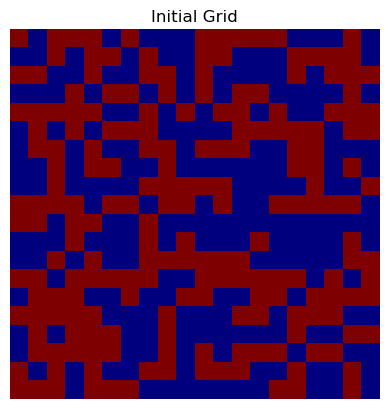

In [37]:

grid_size = 20  # размер сетки (20x20)
num_agents = grid_size * grid_size // 2  # количество агентов каждого типа
num_empty = grid_size * grid_size - 2 * num_agents  # количество пустых ячеек

# Инициализация агентов
agents = np.array([0]*num_empty + [1]*num_agents + [2]*num_agents)  # 0 - пустая ячейка, 1 - агент типа 1, 2 - агент типа 2
np.random.shuffle(agents)  # случайным образом перемешиваем агентов
grid = agents.reshape((grid_size, grid_size))  # преобразуем в сетку размером grid_size x grid_size

# Визуализация начальной сетки
plt.imshow(grid, cmap='jet')
plt.title("Initial Grid")
plt.axis('off')
plt.show()


### Satisfaction function

In [38]:
def get_neighbors(grid, x, y):
    """Получаем соседей для ячейки (x, y)"""
    neighbors = []
    for i in range(max(0, x-1), min(grid_size, x+2)):
        for j in range(max(0, y-1), min(grid_size, y+2)):
            if (i, j) != (x, y):  # не включаем саму ячейку
                neighbors.append(grid[i, j])
    return neighbors

def is_satisfied(grid, x, y, R):
    """Проверяем, удовлетворен ли агент (x, y)"""
    neighbors = get_neighbors(grid, x, y)
    same_type_neighbors = np.sum(np.array(neighbors) == grid[x, y])  # считаем агентов того же типа
    satisfaction = same_type_neighbors / len(neighbors)
    return satisfaction >= R


### Agent movement

In [39]:
def move_agents(grid, unsatisfied_agents):
    """Перемещаем неудовлетворенных агентов в пустые ячейки"""
    # Получаем пустые ячейки
    empty_cells = list(zip(*np.where(grid == 0)))
    np.random.shuffle(empty_cells)  # случайным образом перемешиваем пустые ячейки

    # Перемещаем агентов
    for idx, (x, y) in enumerate(unsatisfied_agents):
        if idx >= len(empty_cells):
            break  # Нет больше пустых ячеек
        new_x, new_y = empty_cells[idx]
        grid[new_x, new_y] = grid[x, y]  # Перемещаем агента
        grid[x, y] = 0  # Очищаем старую ячейку


### Simulation function

In [40]:
def simulate_schelling(R, max_iterations=100):
    grid = np.array([0]*num_empty + [1]*num_agents + [2]*num_agents)
    np.random.shuffle(grid)
    grid = grid.reshape((grid_size, grid_size))

    unsatisfied_counts = []  # Список для подсчета неудовлетворенных агентов на каждом шаге

    for iteration in range(max_iterations):
        unsatisfied_agents = []

        # Проходим по всем ячейкам и проверяем удовлетворенность агентов
        for x in range(grid_size):
            for y in range(grid_size):
                if grid[x, y] != 0 and not is_satisfied(grid, x, y, R):  # Если агент неудовлетворен
                    unsatisfied_agents.append((x, y))

        unsatisfied_counts.append(len(unsatisfied_agents))  # Сохраняем количество неудовлетворенных агентов

        if len(unsatisfied_agents) == 0:
            break  # Все агенты удовлетворены

        move_agents(grid, unsatisfied_agents)  # Перемещаем неудовлетворенных агентов

    return grid, unsatisfied_counts


### GIF

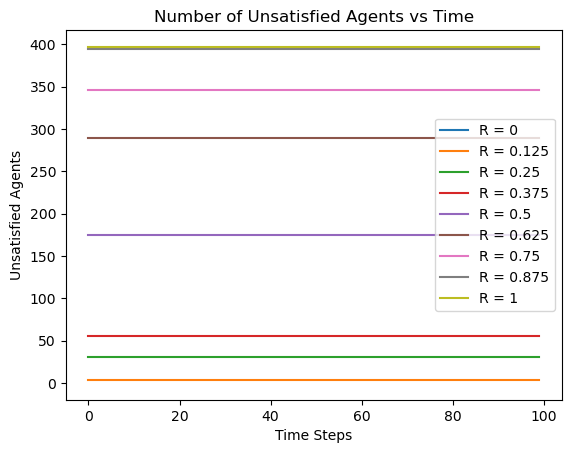

In [41]:
values_of_R = [0, 1/8, 1/4, 3/8, 1/2, 5/8, 3/4, 7/8, 1]
all_unsatisfied_counts = {}

for R in values_of_R:
    frames = []
    unsatisfied_counts = []

    grid, unsatisfied_counts = simulate_schelling(R)
    all_unsatisfied_counts[R] = unsatisfied_counts

    # Создаем GIF
    fig = plt.figure(figsize=(6,6))
    ims = []

    # Для каждого шага в симуляции добавляем изображение сетки
    ims.append([plt.imshow(grid, cmap='jet', animated=True)])
    plt.axis('off')
    ani = animation.ArtistAnimation(fig, ims, interval=200, blit=True)
    ani.save(f'schelling_R_{R:.2f}.gif', writer='pillow')
    plt.close()

    # Строим график количества неудовлетворенных агентов
    plt.plot(range(len(unsatisfied_counts)), unsatisfied_counts, label=f"R = {R}")
    
plt.xlabel('Time Steps')
plt.ylabel('Unsatisfied Agents')
plt.title('Number of Unsatisfied Agents vs Time')
plt.legend()
plt.show()

### Graph of unsatisfaied agents

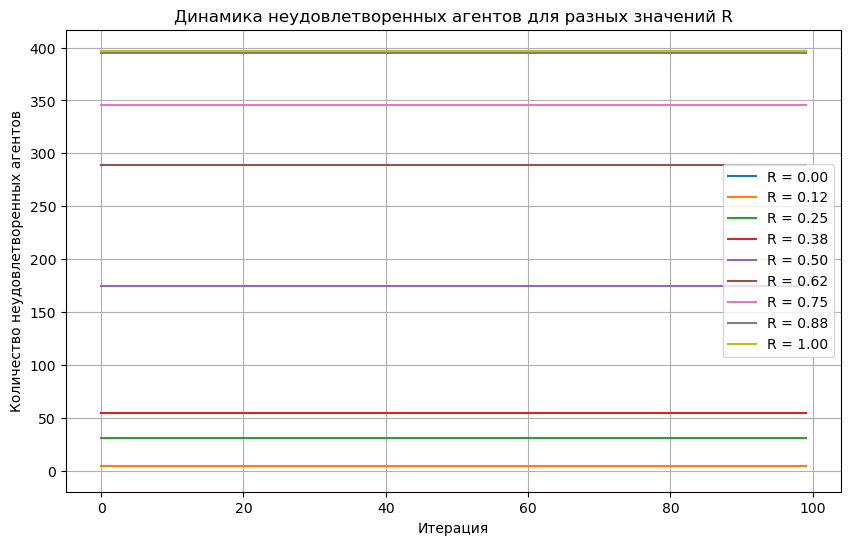

In [42]:
plt.figure(figsize=(10,6))

for R in values_of_R:
    counts = all_unsatisfied_counts[R]
    plt.plot(counts, label=f'R = {R:.2f}')

plt.xlabel('Итерация')
plt.ylabel('Количество неудовлетворенных агентов')
plt.title('Динамика неудовлетворенных агентов для разных значений R')
plt.legend()
plt.grid(True)
plt.show()


In [50]:
import numpy as np
import matplotlib.pyplot as plt
import imageio
import os
import matplotlib.colors as mcolors


# Define the grid size
GRID_SIZE = 50  # 50x50 grid

# Define agent types
EMPTY = 0
TYPE_X = 1
TYPE_O = 2

def initialize_grid(grid_size):
    # Half X and half O agents
    num_agents = grid_size * grid_size
    num_each = num_agents // 2
    grid = np.array([TYPE_X]*num_each + [TYPE_O]*(num_agents - num_each))
    np.random.shuffle(grid)
    grid = grid.reshape((grid_size, grid_size))
    return grid

def get_neighbors(grid, x, y):
    neighbors = []
    for dx in [-1,0,1]:
        for dy in [-1,0,1]:
            if dx == 0 and dy == 0:
                continue
            nx, ny = x + dx, y + dy
            if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1]:
                neighbors.append(grid[nx, ny])
    return neighbors

def is_satisfied(grid, x, y, R):
    agent = grid[x, y]
    if agent == EMPTY:
        return True
    neighbors = get_neighbors(grid, x, y)
    same_type = neighbors.count(agent)
    total = len([n for n in neighbors if n != EMPTY])
    if total == 0:
        return True  # No neighbors to compare
    ratio = same_type / total
    return ratio >= R

def find_dissatisfied_agents(grid, R):
    dissatisfied = []
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            if not is_satisfied(grid, x, y, R):
                dissatisfied.append((x, y))
    return dissatisfied

def find_empty_cells(grid):
    empty = list(zip(*np.where(grid == EMPTY)))
    return empty

def move_agents(grid, dissatisfied, empty):
    np.random.shuffle(empty)  # Randomize empty cells
    num_moves = min(len(dissatisfied), len(empty))
    for i in range(num_moves):
        agent_pos = dissatisfied[i]
        new_pos = empty[i]
        grid[new_pos] = grid[agent_pos]
        grid[agent_pos] = EMPTY
    return grid

def simulate(grid_size, R_values, max_steps=100):
    results = {}
    for R in R_values:
        grid = initialize_grid(grid_size)
        move_counts = []
        frames = []
        for step in range(max_steps):
            dissatisfied = find_dissatisfied_agents(grid, R)
            move_counts.append(len(dissatisfied))
            # Save frame for GIF
            frames.append(grid.copy())
            if len(dissatisfied) == 0:
                print(f"R={R}: Stabilized at step {step}")
                break
            empty = find_empty_cells(grid)
            grid = move_agents(grid, dissatisfied, empty)
        results[R] = {
            'frames': frames,
            'move_counts': move_counts
        }
    return results


In [51]:
def create_gif(frames, R, grid_size, output_dir='gifs'):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    images = []
    for grid in frames:
        plt.figure(figsize=(5,5))
        cmap = mcolors.ListedColormap(['white', 'black', 'red'])
        plt.imshow(grid, cmap=cmap, vmin=0, vmax=2)
        plt.title(f'R = {R}')
        plt.axis('off')
        plt.tight_layout()
        # Save to a temporary file
        temp_file = 'temp.png'
        plt.savefig(temp_file)
        plt.close()
        images.append(imageio.imread(temp_file))
    if os.path.exists(temp_file):
        os.remove(temp_file)

    # Save as GIF
    gif_path = os.path.join(output_dir, f'R_{int(R*100)}.gif')
    imageio.mimsave(gif_path, images, duration=0.5)
    print(f'GIF saved to {gif_path}')

# Example usage:
# create_gif(frames, R=0.5, grid_size=50)


In [52]:
def plot_move_counts(results, R_values, output_path='move_counts.png'):
    plt.figure(figsize=(10,6))
    for R in R_values:
        move_counts = results[R]['move_counts']
        plt.plot(range(len(move_counts)), move_counts, label=f'R={R}')
    plt.xlabel('Time Steps')
    plt.ylabel('Number of Households Wanting to Move')
    plt.title('Households Wanting to Move Over Time for Different R Values')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()
    print(f'Plot saved to {output_path}')


R=0: Stabilized at step 0


C:\Users\Oleg\AppData\Local\Temp\ipykernel_17240\2353461880.py:16: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(temp_file))


GIF saved to gifs\R_0.gif
GIF saved to gifs\R_12.gif
GIF saved to gifs\R_25.gif
GIF saved to gifs\R_37.gif
GIF saved to gifs\R_50.gif
GIF saved to gifs\R_62.gif
GIF saved to gifs\R_75.gif
GIF saved to gifs\R_87.gif
GIF saved to gifs\R_100.gif


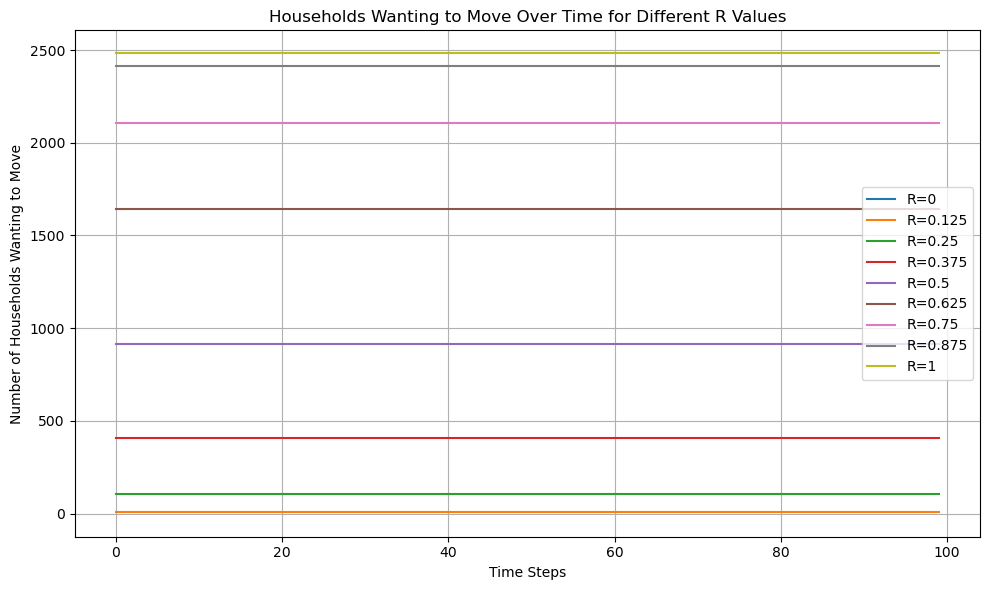

Plot saved to move_counts.png


In [53]:
def main():
    grid_size = 50  # Adjust as needed
    R_values = [0, 1/8, 1/4, 3/8, 1/2, 5/8, 3/4, 7/8, 1]
    max_steps = 100  # Adjust as needed

    # Run simulation
    results = simulate(grid_size, R_values, max_steps)

    # Create GIFs
    for R in R_values:
        frames = results[R]['frames']
        create_gif(frames, R, grid_size)

    # Plot move counts
    plot_move_counts(results, R_values)

if __name__ == "__main__":
    main()


Запуск симуляции для R=0 с empty_ratio=0.1
R=0: Стабилизировалось на шаге 0
Запуск симуляции для R=0.125 с empty_ratio=0.1
R=0.125, шаг 0: перемещено агентов 25, осталось недовольных 25
R=0.125: Стабилизировалось на шаге 1
Запуск симуляции для R=0.25 с empty_ratio=0.1
R=0.25, шаг 0: перемещено агентов 160, осталось недовольных 160
R=0.25, шаг 1: перемещено агентов 50, осталось недовольных 50
R=0.25, шаг 2: перемещено агентов 24, осталось недовольных 24
R=0.25, шаг 3: перемещено агентов 9, осталось недовольных 9
R=0.25, шаг 4: перемещено агентов 4, осталось недовольных 4
R=0.25: Стабилизировалось на шаге 5
Запуск симуляции для R=0.375 с empty_ratio=0.1
R=0.375, шаг 0: перемещено агентов 250, осталось недовольных 452
R=0.375, шаг 1: перемещено агентов 250, осталось недовольных 262
R=0.375, шаг 2: перемещено агентов 208, осталось недовольных 208
R=0.375, шаг 3: перемещено агентов 161, осталось недовольных 161
R=0.375, шаг 4: перемещено агентов 105, осталось недовольных 105
R=0.375, шаг 5:

C:\Users\Oleg\AppData\Local\Temp\ipykernel_17240\1427912397.py:127: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(temp_file))


GIF сохранен в gifs\R_0.gif
GIF сохранен в gifs\R_12.gif
GIF сохранен в gifs\R_25.gif
GIF сохранен в gifs\R_37.gif
GIF сохранен в gifs\R_50.gif
GIF сохранен в gifs\R_62.gif
GIF сохранен в gifs\R_75.gif
GIF сохранен в gifs\R_87.gif
GIF сохранен в gifs\R_100.gif


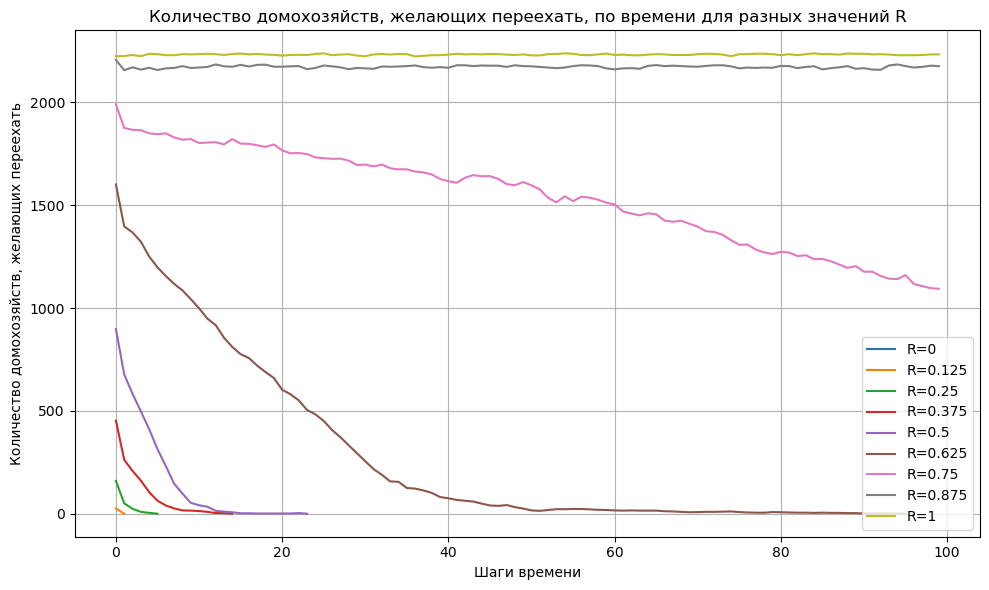

График сохранен в move_counts.png


In [54]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors  # Импортируем colors отдельно
import imageio
import os

# Определение размеров сетки
GRID_SIZE = 50  # 50x50 сетка

# Определение типов агентов
EMPTY = 0
TYPE_X = 1
TYPE_O = 2

def initialize_grid(grid_size, empty_ratio=0.1):
    """
    Инициализирует сетку с заданным соотношением пустых ячеек.

    Parameters:
    - grid_size: размер сетки (grid_size x grid_size)
    - empty_ratio: доля пустых ячеек (от 0 до 1)

    Returns:
    - grid: инициализированная сетка
    """
    num_cells = grid_size * grid_size
    num_empty = int(num_cells * empty_ratio)
    num_agents = num_cells - num_empty
    num_each = num_agents // 2

    # Создаем массив с TYPE_X, TYPE_O и EMPTY
    grid = np.array([TYPE_X]*num_each + [TYPE_O]*(num_agents - num_each) + [EMPTY]*num_empty)
    np.random.shuffle(grid)
    grid = grid.reshape((grid_size, grid_size))
    return grid

def get_neighbors(grid, x, y):
    neighbors = []
    for dx in [-1,0,1]:
        for dy in [-1,0,1]:
            if dx == 0 and dy == 0:
                continue
            nx, ny = x + dx, y + dy
            if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1]:
                neighbors.append(grid[nx, ny])
    return neighbors

def is_satisfied(grid, x, y, R):
    agent = grid[x, y]
    if agent == EMPTY:
        return True
    neighbors = get_neighbors(grid, x, y)
    same_type = neighbors.count(agent)
    total = len([n for n in neighbors if n != EMPTY])
    if total == 0:
        return True  # Нет соседей для сравнения
    ratio = same_type / total
    return ratio >= R

def find_dissatisfied_agents(grid, R):
    dissatisfied = []
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            if not is_satisfied(grid, x, y, R):
                dissatisfied.append((x, y))
    return dissatisfied

def find_empty_cells(grid):
    empty = list(zip(*np.where(grid == EMPTY)))
    return empty

def move_agents(grid, dissatisfied, empty):
    np.random.shuffle(empty)  # Рандомизируем пустые клетки
    num_moves = min(len(dissatisfied), len(empty))
    moved_agents = 0  # Счетчик перемещенных агентов
    for i in range(num_moves):
        agent_pos = dissatisfied[i]
        new_pos = empty[i]
        grid[new_pos] = grid[agent_pos]
        grid[agent_pos] = EMPTY
        moved_agents += 1
    return grid, moved_agents

def simulate(grid_size, R_values, empty_ratio=0.1, max_steps=100):
    results = {}
    for R in R_values:
        grid = initialize_grid(grid_size, empty_ratio)
        move_counts = []
        frames = []
        print(f"Запуск симуляции для R={R} с empty_ratio={empty_ratio}")
        for step in range(max_steps):
            dissatisfied = find_dissatisfied_agents(grid, R)
            move_counts.append(len(dissatisfied))
            # Сохранение кадра для GIF
            frames.append(grid.copy())
            if len(dissatisfied) == 0:
                print(f"R={R}: Стабилизировалось на шаге {step}")
                break
            empty = find_empty_cells(grid)
            grid, moved_agents = move_agents(grid, dissatisfied, empty)
            print(f"R={R}, шаг {step}: перемещено агентов {moved_agents}, осталось недовольных {len(dissatisfied)}")
            if moved_agents == 0:
                print(f"R={R}: Никаких перемещений на шаге {step}, прекращение симуляции")
                break
        results[R] = {
            'frames': frames,
            'move_counts': move_counts
        }
    return results

def create_gif(frames, R, grid_size, output_dir='gifs'):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    images = []
    # Определяем цветовую карту: 0 - белый, 1 - черный, 2 - красный
    cmap = mcolors.ListedColormap(['white', 'black', 'red'])
    for grid in frames:
        plt.figure(figsize=(5,5))
        plt.imshow(grid, cmap=cmap, vmin=0, vmax=2)
        plt.title(f'R = {R}')
        plt.axis('off')
        plt.tight_layout()
        # Сохранение во временный файл
        temp_file = 'temp.png'
        plt.savefig(temp_file)
        plt.close()
        images.append(imageio.imread(temp_file))
    # Удаляем временный файл
    if os.path.exists(temp_file):
        os.remove(temp_file)
    # Сохраняем как GIF
    gif_path = os.path.join(output_dir, f'R_{int(R*100)}.gif')
    imageio.mimsave(gif_path, images, duration=0.5)
    print(f'GIF сохранен в {gif_path}')

def plot_move_counts(results, R_values, output_path='move_counts.png'):
    plt.figure(figsize=(10,6))
    for R in R_values:
        move_counts = results[R]['move_counts']
        plt.plot(range(len(move_counts)), move_counts, label=f'R={R}')
    plt.xlabel('Шаги времени')
    plt.ylabel('Количество домохозяйств, желающих переехать')
    plt.title('Количество домохозяйств, желающих переехать, по времени для разных значений R')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()
    print(f'График сохранен в {output_path}')

def main():
    grid_size = 50  # Размер сетки, можно изменить
    R_values = [0, 1/8, 1/4, 3/8, 1/2, 5/8, 3/4, 7/8, 1]
    empty_ratio = 0.1  # 10% пустых ячеек
    max_steps = 100  # Максимальное количество шагов, можно изменить

    # Запуск симуляции
    results = simulate(grid_size, R_values, empty_ratio, max_steps)

    # Создание GIF для каждого R
    for R in R_values:
        frames = results[R]['frames']
        create_gif(frames, R, grid_size)

    # Построение графика
    plot_move_counts(results, R_values)

if __name__ == "__main__":
    main()


C:\Users\Oleg\AppData\Local\Temp\ipykernel_17240\2604449958.py:104: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  images.append(imageio.imread(temp_file))


GIF сохранен в gifs\R_0.gif
GIF сохранен в gifs\R_12.gif
GIF сохранен в gifs\R_25.gif
GIF сохранен в gifs\R_37.gif
GIF сохранен в gifs\R_50.gif
GIF сохранен в gifs\R_62.gif
GIF сохранен в gifs\R_75.gif
GIF сохранен в gifs\R_87.gif
GIF сохранен в gifs\R_100.gif


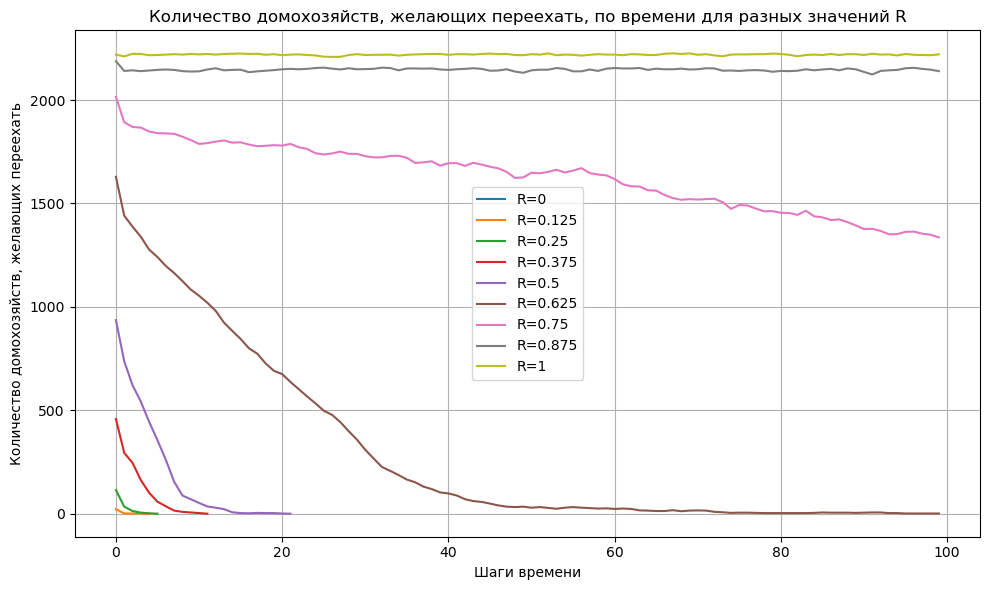

График сохранен в move_counts.png


In [56]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import imageio
import os

GRID_SIZE = 50
EMPTY = 0
TYPE_X = 1
TYPE_O = 2

def initialize_grid(grid_size, empty_ratio=0.1):
    num_cells = grid_size * grid_size
    num_empty = int(num_cells * empty_ratio)
    num_agents = num_cells - num_empty
    num_each = num_agents // 2

    grid = np.array([TYPE_X]*num_each + [TYPE_O]*(num_agents - num_each) + [EMPTY]*num_empty)
    np.random.shuffle(grid)
    return grid.reshape((grid_size, grid_size))

def get_neighbors(grid, x, y):
    neighbors = []
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == 0 and dy == 0:
                continue
            nx, ny = x + dx, y + dy
            if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1]:
                neighbors.append(grid[nx, ny])
    return neighbors

def is_satisfied(grid, x, y, R):
    agent = grid[x, y]
    if agent == EMPTY:
        return True
    neighbors = get_neighbors(grid, x, y)
    same_type = neighbors.count(agent)
    total = len([n for n in neighbors if n != EMPTY])
    if total == 0:
        return True
    ratio = same_type / total
    return ratio >= R

def find_dissatisfied_agents(grid, R):
    dissatisfied = []
    for x in range(grid.shape[0]):
        for y in range(grid.shape[1]):
            if grid[x, y] != EMPTY and not is_satisfied(grid, x, y, R):
                dissatisfied.append((x, y))
    return dissatisfied

def find_empty_cells(grid):
    return list(zip(*np.where(grid == EMPTY)))

def move_agents(grid, dissatisfied, empty):
    np.random.shuffle(empty)
    num_moves = min(len(dissatisfied), len(empty))
    moved_agents = 0
    for i in range(num_moves):
        agent_pos = dissatisfied[i]
        new_pos = empty[i]
        grid[new_pos] = grid[agent_pos]
        grid[agent_pos] = EMPTY
        moved_agents += 1
    return grid, moved_agents

def simulate(grid_size, R_values, empty_ratio=0.1, max_steps=100):
    results = {}
    for R in R_values:
        grid = initialize_grid(grid_size, empty_ratio)
        move_counts = []
        frames = []
        for step in range(max_steps):
            dissatisfied = find_dissatisfied_agents(grid, R)
            move_counts.append(len(dissatisfied))
            frames.append(grid.copy())
            if len(dissatisfied) == 0:
                break
            empty = find_empty_cells(grid)
            grid, moved_agents = move_agents(grid, dissatisfied, empty)
            if moved_agents == 0:
                break
        results[R] = {
            'frames': frames,
            'move_counts': move_counts
        }
    return results

def create_gif(frames, R, grid_size, output_dir='gifs'):
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    images = []
    cmap = mcolors.ListedColormap(['white', 'green', 'red'])
    for grid in frames:
        plt.figure(figsize=(5,5))
        plt.imshow(grid, cmap=cmap, vmin=0, vmax=2)
        plt.title(f'R = {R}')
        plt.axis('off')
        plt.tight_layout()
        temp_file = 'temp.png'
        plt.savefig(temp_file)
        plt.close()
        images.append(imageio.imread(temp_file))
    if os.path.exists(temp_file):
        os.remove(temp_file)
    gif_path = os.path.join(output_dir, f'R_{int(R*100)}.gif')
    imageio.mimsave(gif_path, images, duration=0.5)
    print(f'GIF сохранен в {gif_path}')

def plot_move_counts(results, R_values, output_path='move_counts.png'):
    plt.figure(figsize=(10,6))
    for R in R_values:
        move_counts = results[R]['move_counts']
        plt.plot(range(len(move_counts)), move_counts, label=f'R={R}')
    plt.xlabel('Шаги времени')
    plt.ylabel('Количество домохозяйств, желающих переехать')
    plt.title('Количество домохозяйств, желающих переехать, по времени для разных значений R')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(output_path)
    plt.show()
    print(f'График сохранен в {output_path}')

def main():
    grid_size = 50
    R_values = [0, 1/8, 1/4, 3/8, 1/2, 5/8, 3/4, 7/8, 1]
    empty_ratio = 0.1
    max_steps = 100

    results = simulate(grid_size, R_values, empty_ratio, max_steps)

    for R in R_values:
        frames = results[R]['frames']
        create_gif(frames, R, grid_size)

    plot_move_counts(results, R_values)

if __name__ == "__main__":
    main()
